In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
cif = tf.keras.datasets.cifar100
(x_train , y_train ),( x_test , y_test )= cif.load_data()
x_test , x_train = x_test / 255.0 , x_train / 255.0

In [15]:
x_train[0].shape

(32, 32, 3)

In [16]:
model = tf.keras.models.Sequential([

    # flatten layer has been deleted
    # weigth = mask  / kenel / filter  --- >  LAYE HAYE CONVOLUTION HASTAN INJA
    # shabake rooye ina train va update mishe
    # mask ha dar tasvire rangi barabarand ba 3*3*3

    # deep learning
    tf.keras.layers.Conv2D(filters= 128 , kernel_size = (3,3) , activation="relu" ,input_shape=(32,32 , 3) ) ,
    tf.keras.layers.Conv2D(filters= 128 , kernel_size = (3,3) , activation="relu") ,
    tf.keras.layers.MaxPooling2D() ,
    tf.keras.layers.Dropout(0.4) ,

    tf.keras.layers.Conv2D(filters= 256 , kernel_size = (3,3) , activation="relu") ,
    tf.keras.layers.Conv2D(filters= 256 , kernel_size = (3,3) , activation="relu") ,
    tf.keras.layers.MaxPooling2D() ,
    tf.keras.layers.Dropout(0.4) ,

    # tf.keras.layers.Conv2D(filters= 512 , kernel_size = (3,3) , activation="relu") ,
    # tf.keras.layers.Conv2D(filters= 512 , kernel_size = (3,3) , activation="relu") ,
    # tf.keras.layers.MaxPooling2D() ,

    # data haye ma arraye 2 bodi hastan
    # ama MLP 1 bodi mikhad --- > pas majboorim flatten bezanim
    tf.keras.layers.Flatten() ,

    # machine learning / fully connected
    tf.keras.layers.Dense(250 , activation="sigmoid") ,
    #tf.keras.layers.Dense(128 , activation="sigmoid") ,
    # tf.keras.layers.Dense(512 , activation="relu") ,
    tf.keras.layers.Dropout(0.6) ,
    tf.keras.layers.Dense(100 , activation="softmax")
])



In [17]:
model.compile(optimizer= "adamax" , loss= tf.keras.losses.sparse_categorical_crossentropy , metrics=["accuracy"])

out = model.fit(x_train , y_train , epochs= 50)
model.evaluate(x_test , y_test)

Epoch 1/50
1563/1563 [==============================] - 22s 12ms/step - loss: 4.5142 - accuracy: 0.0253
Epoch 2/50
1563/1563 [==============================] - 19s 12ms/step - loss: 4.1800 - accuracy: 0.0632
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 3.8692 - accuracy: 0.1089
Epoch 4/50
1563/1563 [==============================] - 19s 12ms/step - loss: 3.6436 - accuracy: 0.1467
Epoch 5/50
1563/1563 [==============================] - 19s 12ms/step - loss: 3.4463 - accuracy: 0.1804
Epoch 6/50
1563/1563 [==============================] - 19s 12ms/step - loss: 3.2778 - accuracy: 0.2133
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 3.1369 - accuracy: 0.2402
Epoch 8/50
1563/1563 [==============================] - 19s 12ms/step - loss: 3.0133 - accuracy: 0.2638
Epoch 9/50
1563/1563 [==============================] - 19s 12ms/step - loss: 2.8986 - accuracy: 0.2830
Epoch 10/50
1563/1563 [==============================] - 19s 12m

[1.665230631828308, 0.5507000088691711]

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 256)       590080    
                                                      

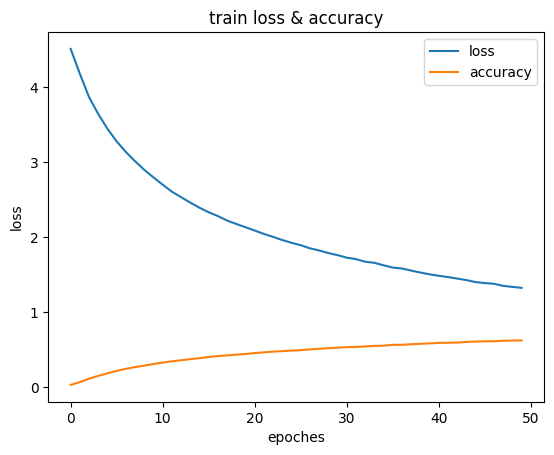

In [19]:
plt.plot(out.history["loss"] )
plt.plot( out.history["accuracy"])
plt.xlabel("epoches")
plt.ylabel("loss")
plt.title("train loss & accuracy")
plt.legend(["loss" , "accuracy"])
plt.show()